In [1]:
def throwFairDie():
    import random as rnd
    return rnd.randint(1, 6)

In [2]:
throwFairDie()

2

In [3]:
import numpy as np

def throwFairDie1():
    import random as rnd
    return rnd.randint(1, 6)

def getMeanDieValue(n=10000):
    meanDieValue = np.zeros((n,6),dtype=np.double)
    randomThrow = throwFairDie() - 1        # assign the first value to the above array
    meanDieValue[0,randomThrow] = 1.0 / 1.0 # one try so far, one success for the die value that is obtained.
    for i in range(1,n):
        randomThrow = throwFairDie() - 1
        meanDieValue[i,randomThrow] = 1.0   # add one success for the value obtained
        meanDieValue[i,:] += meanDieValue[i-1,:]    # combine the recent success with the total number of successes from previous tries.
        meanDieValue[i-1,:] /= np.double(i)  # Now normalize the values form the last try to the total number of tries.
    meanDieValue[-1:,:] /= np.double(n)  # Now normalize the very last try to the total number of tries.
    return meanDieValue

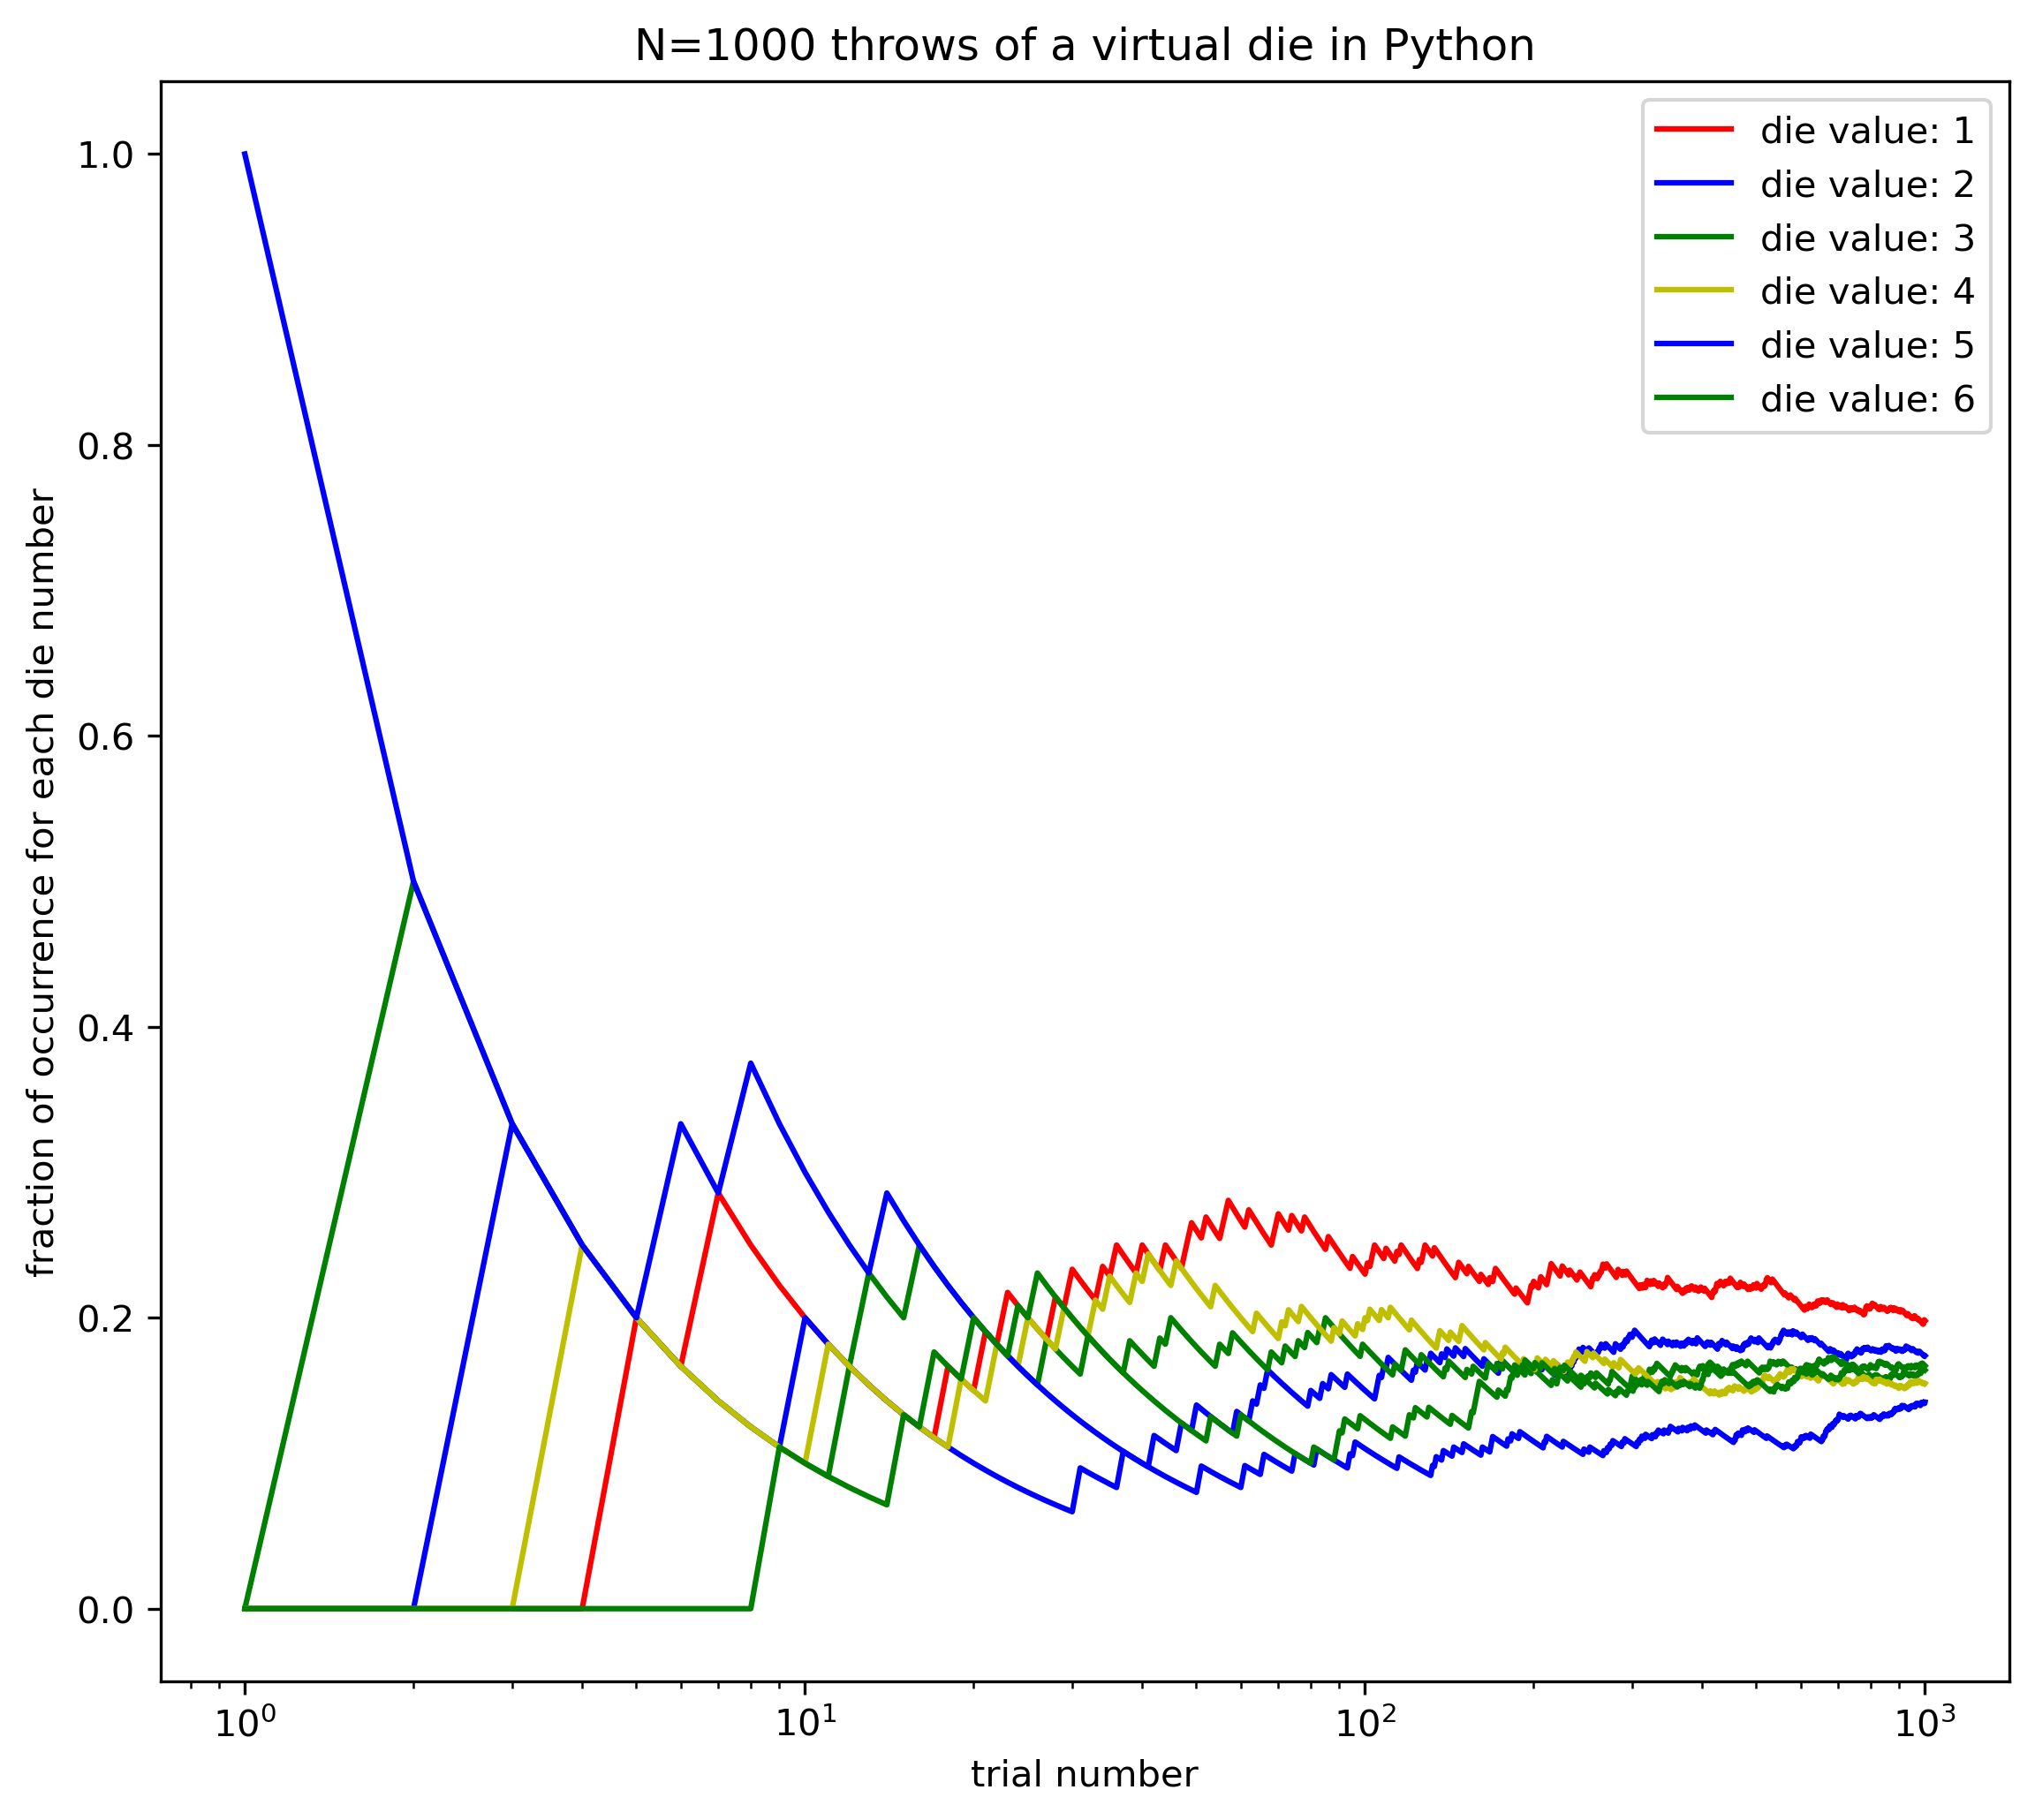

In [4]:
import matplotlib.pyplot as plt

nDieValues = 6 # 6 possible values for a die throw
nTrial = 1000 # total number of die throws
meanDieValues = getMeanDieValue(n=nTrial)

fig = plt.figure( figsize=(9, 8) \
                , dpi= 300 \
                , facecolor='w' \
                , edgecolor='w' \
                ) # create figure object

ax = fig.add_subplot(1,1,1) # Get the axes instance
trial = np.linspace( 1 , nTrial+1 , nTrial )
lineTypes = ['r-','b-','g-','y-','b-','g-']
for i in range( nDieValues ) :
    ax.semilogx ( trial[:] \
                , meanDieValues[:,i] \
                , lineTypes[i] \
                ) # plot with color red, as line
ax.set_xlabel('trial number')
ax.set_ylabel('fraction of occurrence for each die number')
ax.legend(['die value: '+str(i) for i in range(1,7) ],loc="upper right")
ax.set_title('N={} throws of a virtual die in Python'.format(nTrial))
fig.savefig('fairDie.png', dpi=700) # save the figure to an external file
plt.show() # display the figure

pi is: 3.1431


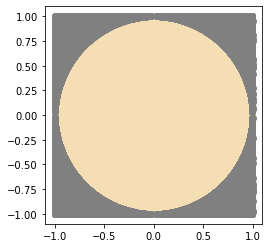

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

n=1E6
x = 1-2*np.random.random(int(n))
y = 1-2*np.random.random(int(n))
insideX,  insideY  = x[(x*x+y*y)<=1],y[(x*x+y*y)<=1]
outsideX, outsideY = x[(x*x+y*y)>1],y[(x*x+y*y)>1]

fig, ax = plt.subplots(1)
ax.scatter(insideX, insideY, c='wheat')
ax.scatter(outsideX, outsideY, c='grey')
ax.set_aspect('equal')
fig.show()

pi = len(insideX) * 4 /(len(insideX)+ len(outsideX))
print ('pi is: %.4f' % pi )

In [6]:
import numpy as np
def MCpi(n): 
    return np.sum(np.random.rand(n)**2+np.random.rand(n)**2<=1)/float(n)*4

In [7]:
print (MCpi(1000000))

3.141428


In [8]:
from numpy import pi
print ('%0.6f' % pi,'real pi')

3.141593 real pi


In [9]:
from numpy import random, sqrt
n = 1000000
p = random.rand(n,2)

# counting the points inside the unit circle
idx = sqrt(p[:,0]**2+p[:,1]**2) < 1

# estimation of pi
print ('result: %.6f' % (sum(idx)/float(n)*4))

result: 3.141504
